# Importing Libraries 

In [102]:
import cv2 as cv
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import itertools

In [32]:
import os
cwd = os.getcwd()
cwd

'/home/kartheekraj/Computer Vision'

# Reading the images from the folder

In [33]:
images = [cv.imread(file) for file in glob.glob('/home/kartheekraj/Computer Vision/Test Data-20220415T052700Z/Test Data/fumo/*.jpg')]

# Displaying the images 

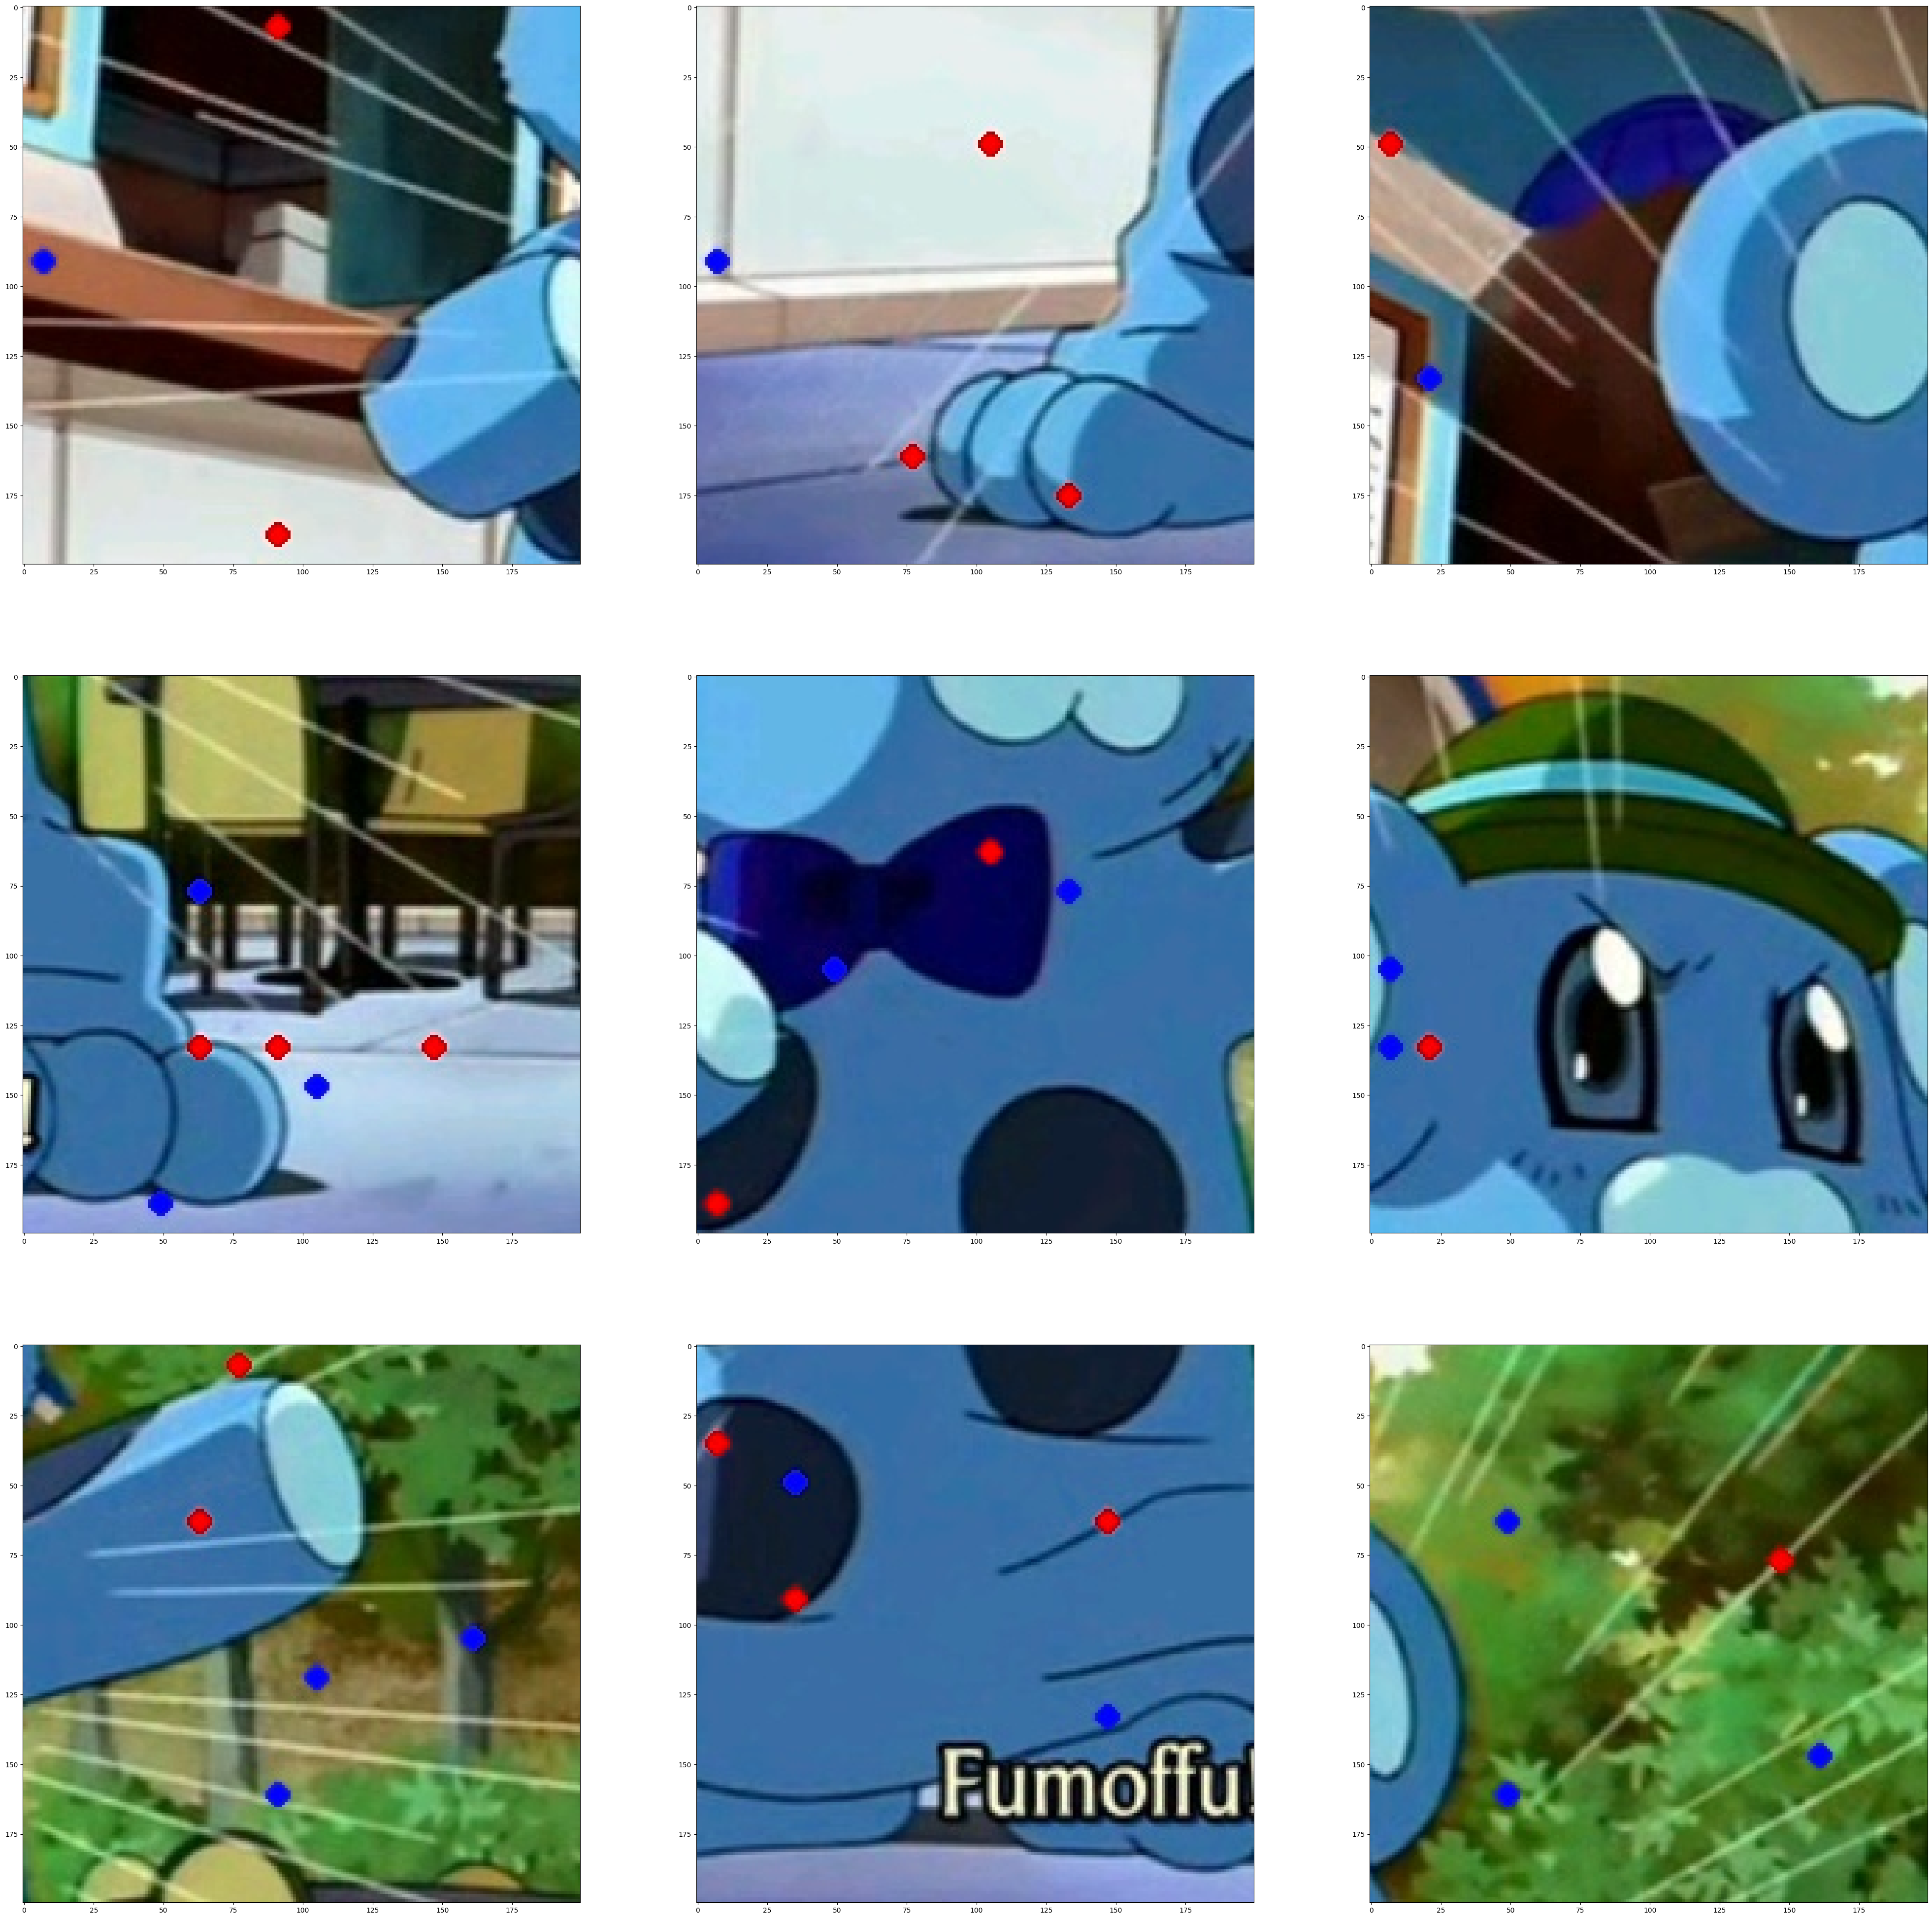

In [37]:
k=0
plt.figure(figsize=(50, 50))
for image in images:
  k=k+1
  plt.subplot(3,3,k) 
  plt.imshow((image))
plt.show()

# Displaying single image from the images list 

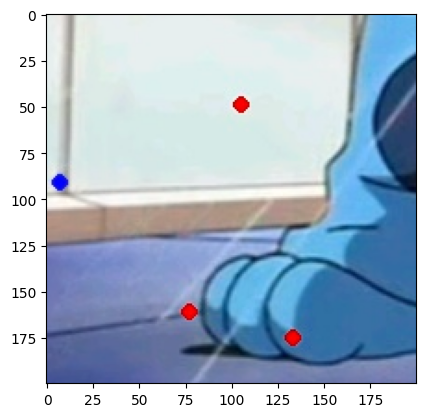

In [98]:
plt.imshow(images[1])
plt.show()

# Sampling on single image to find how many blue and red dots in the image

In [103]:
image1 = images[1]
original = image1.copy()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
lower_blue = np.array([0, 0, 200], dtype="uint8")
upper_blue = np.array([20, 20, 255], dtype="uint8")
lower_red = np.array([200, 0, 0], dtype="uint8")
upper_red = np.array([255, 20, 20], dtype="uint8")
mask_blue = cv.inRange(image1, lower_blue, upper_blue)
mask_red = cv.inRange(image1, lower_red, upper_red)

# Find contours
cnts_blue = cv.findContours(mask_blue, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts_red= cv.findContours(mask_red, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(cnts_blue)
print(cnts_red)
print(len(list(itertools.chain(*cnts_red)))-1)
print(len(list(itertools.chain(*cnts_blue)))-1)
# (image[0],(1,2))
# (image[1],(1,1))

((array([[[ 6, 88]],

       [[ 4, 90]],

       [[ 4, 92]],

       [[ 6, 94]],

       [[ 8, 94]],

       [[10, 92]],

       [[10, 90]],

       [[ 8, 88]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))
((array([[[133, 172]],

       [[132, 173]],

       [[131, 173]],

       [[131, 174]],

       [[130, 175]],

       [[130, 176]],

       [[132, 178]],

       [[134, 178]],

       [[136, 176]],

       [[136, 174]],

       [[134, 172]]], dtype=int32), array([[[ 76, 158]],

       [[ 74, 160]],

       [[ 74, 162]],

       [[ 76, 164]],

       [[ 78, 164]],

       [[ 80, 162]],

       [[ 80, 160]],

       [[ 78, 158]]], dtype=int32), array([[[104,  46]],

       [[102,  48]],

       [[102,  50]],

       [[104,  52]],

       [[106,  52]],

       [[108,  50]],

       [[108,  48]],

       [[106,  46]]], dtype=int32)), array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32))
3
1


# Finding how many blue and red dots in all images and printing against the each  image 

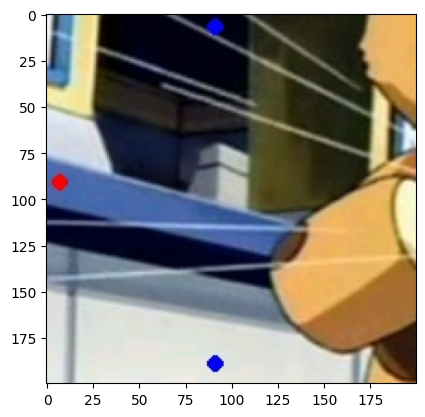

Red dots count - 1
Blue dots count - 2


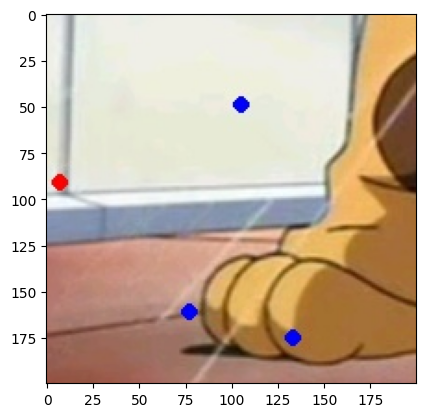

Red dots count - 1
Blue dots count - 3


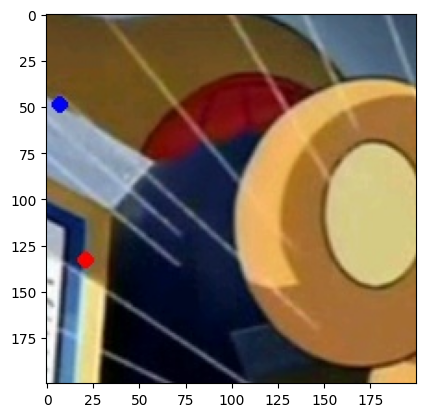

Red dots count - 1
Blue dots count - 1


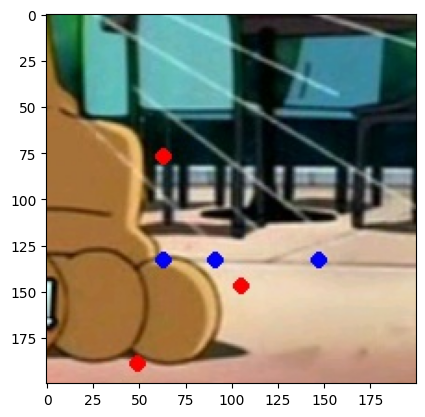

Red dots count - 3
Blue dots count - 3


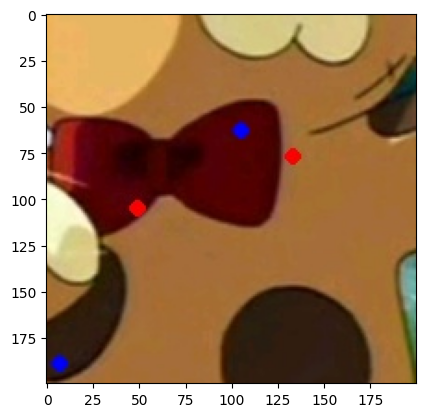

Red dots count - 2
Blue dots count - 2


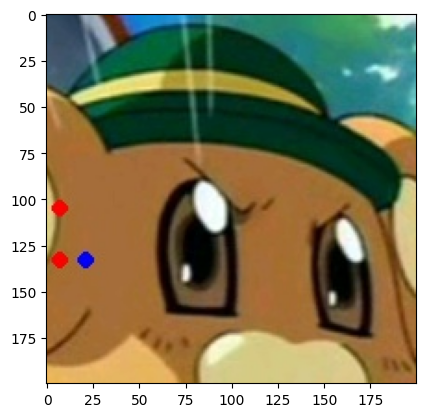

Red dots count - 2
Blue dots count - 1


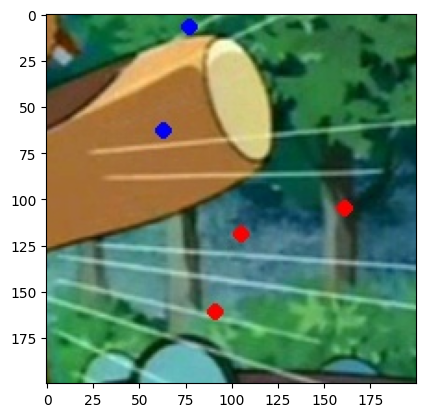

Red dots count - 3
Blue dots count - 2


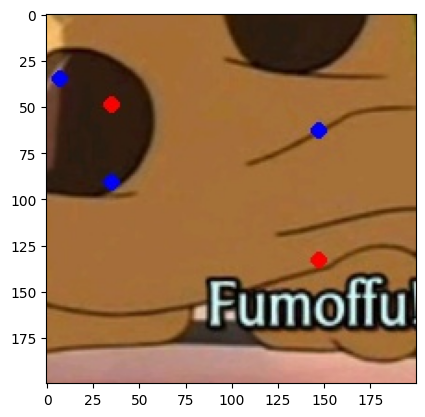

Red dots count - 2
Blue dots count - 3


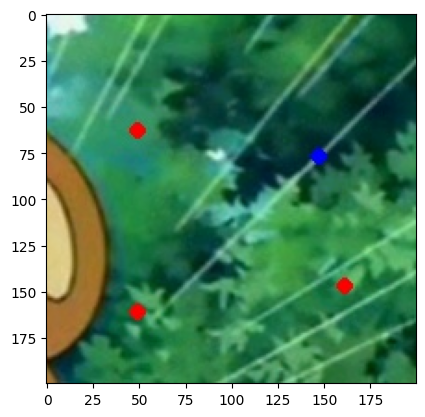

Red dots count - 3
Blue dots count - 1


In [161]:
sample_list=[]
import itertools
for image in images:
    original = image.copy()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    lower_blue = np.array([0, 0, 200], dtype="uint8")
    upper_blue = np.array([20, 20, 255], dtype="uint8")
    lower_red = np.array([200, 0, 0], dtype="uint8")
    upper_red = np.array([255, 20, 20], dtype="uint8")
    mask_blue = cv.inRange(image, lower_blue, upper_blue)
    mask_red = cv.inRange(image, lower_red, upper_red)
    cnts_blue = cv.findContours(mask_blue, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts_red= cv.findContours(mask_red, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    red_dots=len(list(itertools.chain(*cnts_red)))-1
    blue_dots=len(list(itertools.chain(*cnts_blue)))-1
    plt.imshow((image))
    plt.show()
    print('Red dots count -',red_dots)
    print('Blue dots count -',blue_dots)
    sample_list.append([image,(red_dots,blue_dots)])

In [167]:
sample_list

[[array([[[237, 238, 242],
          [250, 251, 255],
          [226, 229, 236],
          ...,
          [239, 183,  90],
          [239, 183,  88],
          [239, 183,  88]],
  
         [[226, 227, 231],
          [244, 245, 249],
          [223, 226, 231],
          ...,
          [239, 183,  90],
          [239, 183,  88],
          [239, 183,  88]],
  
         [[234, 234, 236],
          [248, 249, 251],
          [222, 225, 230],
          ...,
          [239, 183,  90],
          [239, 183,  88],
          [239, 183,  88]],
  
         ...,
  
         [[230, 235, 231],
          [230, 235, 231],
          [230, 235, 229],
          ...,
          [ 62,  28,   0],
          [ 53,  22,   0],
          [ 55,  24,   0]],
  
         [[230, 235, 231],
          [230, 235, 231],
          [230, 235, 231],
          ...,
          [ 74,  38,   4],
          [ 70,  35,   3],
          [ 67,  34,   1]],
  
         [[230, 235, 231],
          [230, 235, 231],
          [230, 235, 231

# After appending the each image against the count of red and blue dots to sample_list ,next task is  sort the list with coordinates so that images will fall in place.

In [222]:
def Sort(sub_li):
    # reverse = None (Sorts in Ascending order)
	# key is set to sort using second element of
	# sublist lambda has been used
	sub_li.sort(key = lambda x: x[1])
	return sub_li
sorted_list=Sort(sample_list)



In [223]:
sorted_list

[[array([[[ 87,  67,  34],
          [ 86,  66,  33],
          [ 84,  65,  32],
          ...,
          [ 54,  72,  94],
          [ 50,  71,  92],
          [ 51,  72,  93]],
  
         [[ 88,  68,  33],
          [ 88,  68,  33],
          [ 89,  69,  34],
          ...,
          [ 54,  72,  94],
          [ 52,  73,  94],
          [ 54,  75,  96]],
  
         [[ 91,  69,  32],
          [ 89,  69,  32],
          [ 89,  69,  32],
          ...,
          [ 55,  73,  97],
          [ 54,  75,  96],
          [ 56,  77,  98]],
  
         ...,
  
         [[245, 251, 249],
          [248, 252, 253],
          [240, 241, 245],
          ...,
          [238, 181,  91],
          [239, 182,  92],
          [239, 182,  92]],
  
         [[245, 251, 249],
          [251, 255, 255],
          [240, 241, 245],
          ...,
          [241, 182,  92],
          [243, 184,  92],
          [241, 182,  90]],
  
         [[241, 247, 245],
          [247, 253, 253],
          [235, 236, 240

# After sorting the list just concatenate the rows and coloumns to form the full image 

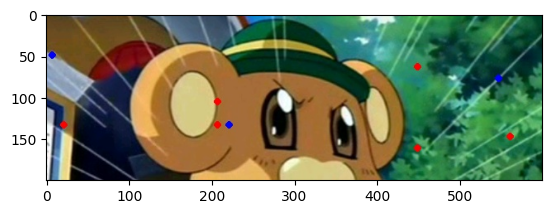

In [308]:
def hconcat_resize_min(im_list, interpolation=cv.INTER_CUBIC):
    h_min = min(im.shape[0] for im in im_list)
    im_list_resize = [cv.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                      for im in im_list]
    return cv.hconcat(im_list_resize)

row_1 = hconcat_resize_min([sorted_list[0][0], sorted_list[3][0], sorted_list[6][0]])

# cv.imwrite('data/dst/opencv_hconcat_resize.jpg', im_h_resize)
plt.imshow(row_1)
plt.show()

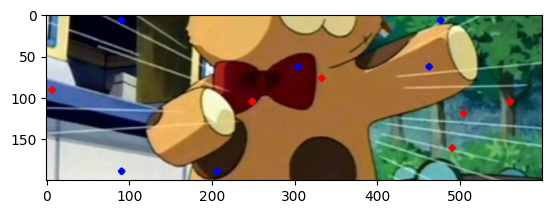

In [318]:

# cv.imwrite('data/dst/opencv_hconcat_resize.jpg', im_h_resize)
plt.imshow(row_2)
plt.show()


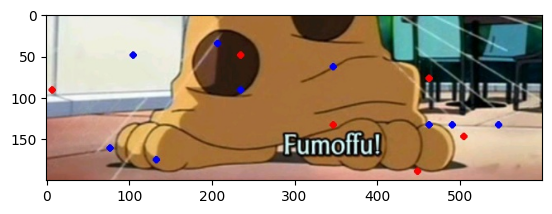

In [320]:
row_3 = hconcat_resize_min([sorted_list[2][0],sorted_list[5][0],sorted_list[8][0]])
# cv.imwrite('data/dst/opencv_hconcat_resize.jpg', im_h_resize)
plt.imshow(row_3)
plt.show()


In [326]:
def vconcat_resize_min(im_list, interpolation=cv.INTER_CUBIC):
    h_min = min(im.shape[0] for im in im_list)
    im_list_resize = [cv.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                      for im in im_list]
    return cv.vconcat(im_list_resize)
fumoffu_image = vconcat_resize_min([row_1, row_2, row_3])


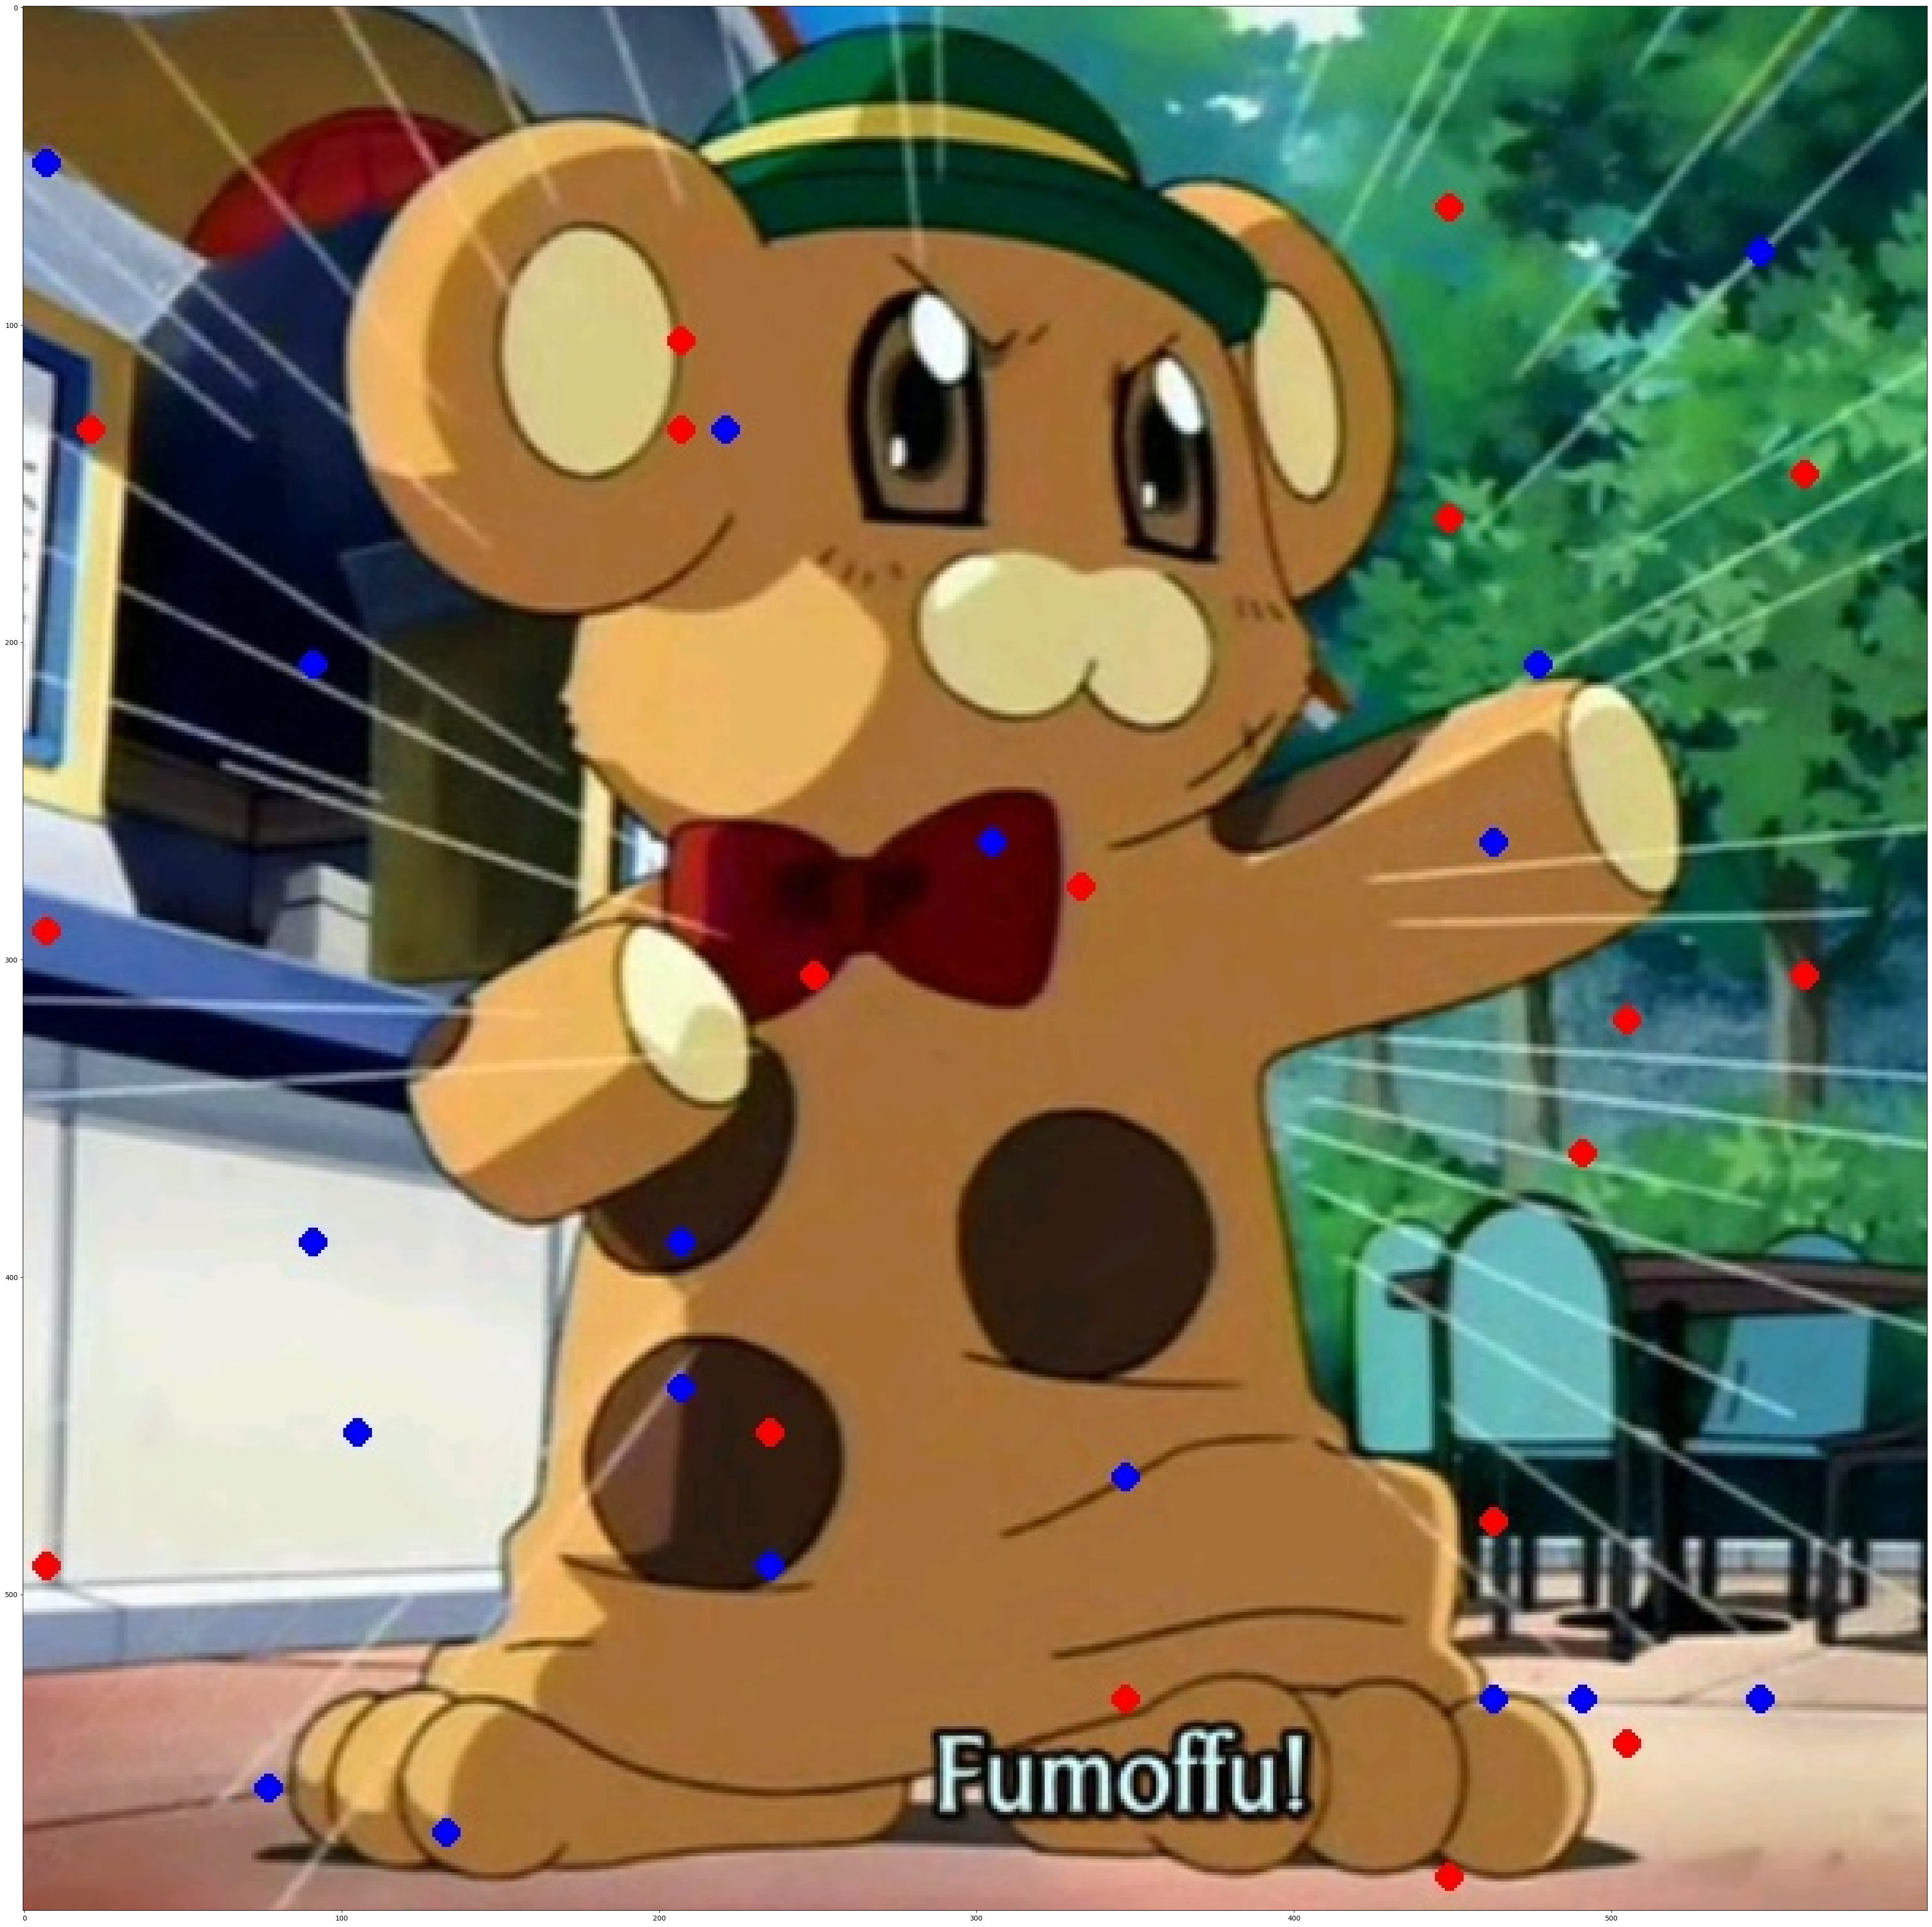

In [328]:
plt.figure(figsize=(50, 50))
plt.imshow(fumoffu_image)
plt.show()